In [35]:
from IPython.display import HTML, display, Image
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 15
MEDIUM_SIZE = 16
LARGE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

<center>
<img src="../images/galvanize-logo.png" alt="galvanize-logo" align="center" style="width: 256px;"/>
</center>

<hr />


## Python Linear Models Intro

An introduction to using linear machine learning models in Python to make predictions

<center>
<img src="../images/python-logo.png" alt="python-logo" align="center" style="width: 256px;"/>
</center>

<hr />

### Learning Objectives

1. **Create a Model** - Use sklearn's implementation to create and train a simple linear regression model

2. **Coefficients** - Interpret coefficients of Linear Regression

3. **Model Validation** - Validate Linear Regression Predictions

Read the objectives

### Introduction

In this lesson, we will explore the use of machine learning models to predict a "target" (also called a dependent variable or a response variable) from one or more data "features" (also called independent variables or predictor variables).

### Introducing "Linear Regression"

Here we will focus on a model called "Linear Regression".

The name is descriptive, in that to use it we need to assume that the relationship of the target to the features is linear. And "regression" means the target is a numeric value.

Linear Regression is an example of supervised learning, since we can train the model with data in which the targets (also called "labels") are known.

### Models

* A machine learning model can predict as-yet unknown information
* A supervised learning model uses known information to "learn" how to predict
* This is powerful, as we can "see into the future"
* A business may save a lot of money if it can predict in this way

### How do models work?

* Models use algorithms to process data
* When a model is given known data, it adjusts its internal settings
* These are known as "parameters"
* Later, that model can make predictions about new, unseen data

### Dependent and independent variables

* The information we want to predict is called the "target"
* The target depends on independent variables called "features"

Note that there can be many features that contribute to predicting a target.

We depend on there being a "relationship" between the features and the target.

### What is a linear relationship?

In this lesson, we are looking at special relationships between features and a target.

These relationships are assumed to be "linear" - what does this mean?

### Graphing a linear relationship

Perhaps the simplest way to understand a linear relationship is to use a graph:

<center>
<img src="../images/simple_lr_graph_perfect.png" alt="simple scatter graph where points line up perfectly" align="center" style="width: 256px;"/>
</center>

Let's call the X axis a feature and the Y axis the target. In a perfect linear relationship, all data points lie exactly on a straight line.

### Real-world linear relationships

But real-world data is not perfect. Here is what real data might look like

<center>
<img src="../images/simple_lr_graph.png" alt="simple scatter graph where points do not line up perfectly" align="center" style="width: 256px;"/>
</center>

Is this still linear?

Yes! We can still treat this data as linear.

There is clearly a linear trend there, even if not perfect.

### Linear Regression in action

Since real-world data does not supply perfect linear relationships, the job of the model is to find a line that is the "best fit".

<center>
<img src="../images/simple_lr_graph_fit.png" alt="simple_lr_graph_fit" align="center" style="width: 256px;"/>
</center>
 
Note that the distance from each point to the line is indicated by the small vertical lines. These show how the real data differs from its linear model. These differences are called "residuals".

Consider asking the class, "Do predictions always lie on this line?"

### A concrete example

Let's look at a simple example - height vs. shoe size:

<center>
<img src="../images/simple_lr_graph_shoe_size.png" alt="simple_lr_graph_shoe_size" align="center" style="width: 256px;"/>
</center>

This is "linear enough" to be valuable and will produce pretty good predictions.

(0.0, 11.0)

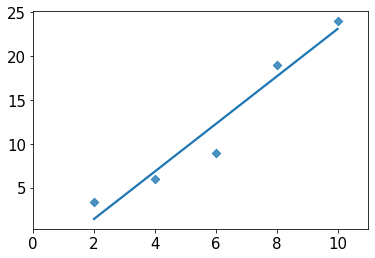

In [30]:
# This is "linear enough" to be valuable and will produce pretty good predictions.
# Note: sns.regplot() will automatically draw a straight line of 'best fit' on top of our datapoint. 
# We will learn how to compute the equation of this line a bit later.

x,y = np.array([2,4,6,8,10]), np.array([3.4,6,9,19,24])


ax = sns.regplot(x=x, y=y, ci=None, marker='D')
ax.set_xlim(0,11)

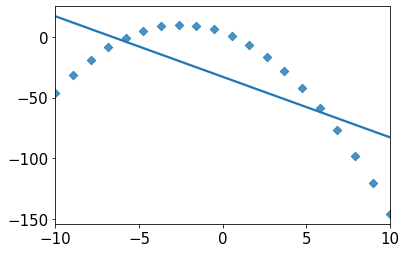

In [32]:
# Now let's look an an example that is definitely NOT linear.
x = np.linspace(-10,10,20)
y = 4- 5*x - x**2 #parabola 
ax = sns.regplot(x=x, y=y, ci=None, marker='D')

# Without doing more preprocessing on your data, this example would produce poor results in a linear model.

### Checks for Understanding

1. How does a simple Linear Regression model learn from training data?


2. What is the difference between a target and a feature?


3. What constitutes a "linear relationship"?

### Using the equation of a line for prediction

The equation of a line, which is enough for simple Linear Regression, is $y = mx + b$. There are two coefficients, $m$ and $b$.

This can be written with two new coefficients $\beta_0$ and $\beta_1$

$\hat{y}_i = \beta_0 + \beta_1 x_i$ 

Now $\beta_0$ is the y-intercept and $\beta_1$ is the slope. 

Here, $\hat{y}_i$ is the predicted output of the model for each sample, $x_i$. The betas are the coefficients of the model. 

### Once you have estimated the betas you then can use them to make predictions of your target y for values of x is that are not a part of your dataset

## Check for Understanding

Suppose, for a sample dataset, our best fit line gives estimates of $\beta_0$ = 2 and $\beta_1$ = 5

Predict $\hat{y}_i$ for $x_i$ = 4.

### Multiple Linear Regression

So far, we have been working with just one feature. But Linear Regression can deal with any number of features!

With each additional feature, we add a new dimension to the graph, so things quickly become hard to visualize...

For example, with one feature, we can show the results on a two dimensional graph, like above.

With two features, the line becomes a plane in 3D space.

Beyond that, the math still works, but there are too many dimensions to imagine easily.

### An actual example

Let's take a look at doing a real Linear Regression. First, we need to import a few Python modules...

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Now we read the data and take a look at a bit of it...

In [40]:
df_full = pd.read_csv('data/cars_multivariate.csv')
df_full.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


Our target is miles per gallon (mpg), and we decide we only want to use 3 features. Here, we make a new dataframe with only the columns we need. In Linear Regresion, it is not always better to include more (or all!) of the features...

In [51]:
df1 = df_full[['mpg', 'weight']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   weight  398 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


Let's take another look at our new dataframe...

In [52]:
df1.describe().T[['min', 'max']]

,min,max
mpg,9.0,46.6
weight,1613.0,5140.0


Remember that Linear Regression assumes the data is linear. One way to tell is to graph the data and take a look...

ALWAYS PLOT YOUR DATA (OR PORTIONS OF YOUR DATA) WHEREEVER POSSIBLY

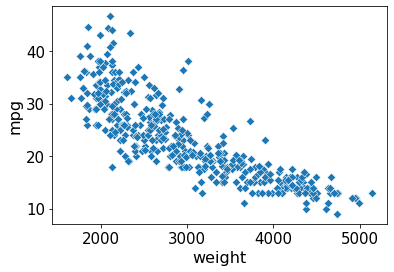

In [50]:
df1 = df_full[['mpg', 'weight']]
ax = sns.scatterplot(x='weight', y='mpg', data=df1, ci=None, marker='D')

Also, we need to avoid choosing features that depend on each other (multi-colinearity) and give no new information. A heat map can help here....

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='Purples');

Remember that our target (y) is miles per gallon. Let's separate out this from our features (X)...

In [ ]:
y = df.mpg
X = df[['cylinders', 'displacement', 'weight']]

Time to train our model!

In [ ]:
# training
model = LinearRegression().fit(X, y)

After training, we can ask the model for its parameters (beta coefficients)...

In [ ]:
# model parameters
model.intercept_, model.coef_

Since we have the actual target values (y), we can compare them to the model's predictions (y_hat), which enables us to see how good the model is. First, get the predictions and visually compare them to the actuals...

In [ ]:
# comparing y to y_hat
y_hat = model.predict(X)
list(zip(y, y_hat))[:5]

One way to calculate how well the model predicts is to calcuate the "r squared" score. A function is available to calculate this metric for you. 1.0 is the best score possible...

In [ ]:
# R-squared
r2_score(y, y_hat)

If you want a metric that is in the same units as the predictions (and is more easily interpretable as a goodness-of-fit measure), try the RMSE...

In [ ]:
# mean squared error
mean_squared_error(y, y_hat)

In [ ]:
# root mean squared error
mean_squared_error(y, y_hat) ** 0.5

You can also look at the residuals directly by subtracing the predictions from the actual values...

In [ ]:
residuals = (y - y_hat).values[:20]
residuals

Let's visualize this better by making a cool plot based on the targets and one of the features...

In [ ]:
# visualize mpg vs weight, fitted line, and residuals
xs = np.linspace(1500, 5200)
b0 = model.intercept_
b1 = model.coef_[-1]
ys = b0 + (b1 * xs)

plt.figure(figsize=(12, 5))
plt.scatter(X.weight, y, c='#ff33cc', alpha=0.7)
plt.plot(xs, ys, label='y=mx+b')
for x_i, y_i in zip(X.weight, y):
    plt.plot([x_i, x_i], [y_i, b1*x_i+b0], color='gray', linestyle='dashed', alpha=0.3)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend();

### Checks for Understanding

1. What are the main two parameters of the `fit` method on a `LinearRegression`?


2. What are some of the ways we can evaluate our model's ability to predict well?


3. What is the purpose of the "heatmap" plot?

### Break-out Exercise

Create your own data to be used in a simple Linear Regression model. Since it is "simple", you will have a single list of feature values and a single list of targets.

Instantiate a `LinearRegression` object and call its `fit` method. Then generate predictions using its `predict` method. Are the predictions what you expect?